# Desafío - Dimensionalidad y agrupación (II)

## Desafío 1: Preparación del ambiente de trabajo
Para este desafío trabajaremos de manera conjunta identificando la paleta de colores de
carátulas de álbumes.
<ul>
<li>Las imágenes se encuentran en una carpeta con el nombre <code>album_covers</code>.</li>
<li>Cada imagen tiene la siguiente nomenclatura: <code>artista-nombre-del-album.jpg</code>.</li>
</ul>
El objetivo es generar un método que nos permita identificar la dominancia de una cantidad
finita de colores.
Para importar imágenes y visualizarlas, vamos a importar las siguientes librerías:
<ul>
<li>Comencemos por incluír las librerías clásicas: <code>pandas</code>, <code>numpy</code> y <code>matplotlib.pyplot</code>.</li>
<li><code>sklearn.cluster.KMeans</code>: para extraer los principales componentes de una matriz
numérica.</li>
<li><code>skimage.io</code>: Para poder ingresar y leer imágenes.</li>
</ul>


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, MiniBatchKMeans
from skimage import io



## Desafío 2: Importación de imágenes
<li>Comencemos por ingresar una imagen a nuestro ambiente de trabajo. Para ello
ocuparemos <code>io.imread</code>. ¿Qué devuelve?</li>
<li>Para visualizar la imágen en el notebook, ocupe <code>io.imshow</code></li>

(1500, 1500, 3)


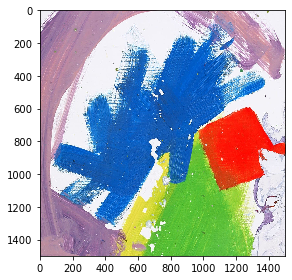

In [7]:
pic = io.imread('./album_covers/alt-j-this-is-all-yours.jpg')
print(pic)
io.imshow(pic)

<code>io.imread</code> devuelve el arreglo de pixeles rgb para mostrar la imagen..

## Desafío 3: Preprocesamiento de imágenes y KMeans
<li>Con la representación numérica de la imágen, vamos a extraer la altura, el ancho y la
cantidad de canales mediante <code>shape</code>.</li>
<li>Posteriormente redimensionaremos la imágen con reshape.</li>
<li>Partamos por inicializar nuestro algoritmo <code>KMeans</code> con un <code>k=8</code>, ¿Qué significa esto?</li>
<li>Vuelva a implementar el mismo algoritmo con <code>MiniBatchKMeans</code>. ¿Qué diferencia
existe con <code>KMeans</code>?</li>


In [21]:
print(pic.shape)
arr = pic.reshape([2250000,3])


(1500, 1500, 3)


In [22]:
kmeans = KMeans(n_clusters=8, random_state=11238)
kmeans.fit_predict(arr)

array([1, 1, 1, ..., 1, 1, 1])

In [25]:
miniKmeans = MiniBatchKMeans(n_clusters=8, random_state=11238)
miniKmeans.fit_predict(arr)

array([0, 0, 0, ..., 0, 0, 0])

<code>k=8</code> significa que KMeans buscará agrupar la muestra en 8 grupos. Luego MiniBatchKMeans se diferencia con el otro en tiempo de procesamiento en casi una quinta parte

## Desafío 4: Extracción de valores
<li>Ahora extraemos las etiquetas predichas con labels_. Hasta el momento las
etiquetas hacen referencia a cada centroide. Para imputar sentido en estos,
debemos extraer los valores de los centroides.</li>
<li>Para extraer los centroides (valores característicos), utilizamos el atributo
cluster_centers_.</li>
<li>Con las etiquetas, generamos un conteo de ocurrencia con np.unique. Para extraer
el conteo, debemos implementar la opción return_counts=True.</li>


In [27]:
pd.Series(kmeans.labels_).value_counts()

1    612440
6    534674
7    335189
3    246465
2    204531
4    149409
5     90325
0     76967
dtype: int64

In [35]:
centroides = kmeans.cluster_centers_
centroides

array([[ 81.19532755, 147.7956999 , 207.90828345],
       [236.38896409, 237.53260825, 243.28425128],
       [147.85525404, 114.79752361, 152.67312293],
       [ 97.20485584, 191.31197812,  55.54614835],
       [241.70425278,  37.00527415,  12.80317654],
       [204.6649912 , 215.15654927,  75.79826844],
       [ 17.44678811,  93.93252669, 184.08577265],
       [185.73934332, 148.03237434, 172.81073993]])

In [36]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([ 76967, 612440, 204531, 246465, 149409,  90325, 534674, 335189],
       dtype=int64))

## Desafío 5: Conversión rgb a hex
<li>Con los centroides, vamos a convertirlos a formato hexadecimal. Vamos a generar
una función y la pasaremos con map por cada centroide.</li>

In [37]:
# creamos la funcion que pasa de rgb a hex
def rgb_hex_it(rgb):
   parsedRgb = list(map(lambda x: int(x), rgb))
   return'#%02x%02x%02x' % (parsedRgb[0], parsedRgb[1], parsedRgb[2])

In [38]:
# iteramos sobre los centroides
colors_centros =  list(map(lambda x: rgb_hex_it(x), centroides))

## Desafío 6: Definición de base
Ahora generamos un DataFrame con las siguientes variables:
<li>El color hex.</li>
<li>La ocurrencia del color en cada pixel count.</li>
<li>El porcentaje de ocurrencia de cada color respecto a cluster_centers_.
Posteriormente ordenaremos los colores de forma descendente por el porcentaje de
ocurrencia.</li>


In [39]:
colors_centros

['#5193cf',
 '#ecedf3',
 '#937298',
 '#61bf37',
 '#f1250c',
 '#ccd74b',
 '#115db8',
 '#b994ac']

In [43]:
frequency = list(np.unique(kmeans.labels_, return_counts=True)[1])
print(frequency)
percents = list(map(lambda x: round(x/sum(frequency), 2),frequency))
print(percents)

[76967, 612440, 204531, 246465, 149409, 90325, 534674, 335189]
[0.03, 0.27, 0.09, 0.11, 0.07, 0.04, 0.24, 0.15]


In [45]:
# lo pasamos a diccionario
hash={'hex':colors_centros, '%':percents, 'freq':frequency}
colorsDf=pd.DataFrame(data=hash).sort_values(by='%', ascending=False)
colorsDf.head()

,hex,%,freq
1,#ecedf3,0.27,612440
6,#115db8,0.24,534674
7,#b994ac,0.15,335189
3,#61bf37,0.11,246465
2,#937298,0.09,204531


## Desafío 7: Visualización
<li>Genere un gráfico de barras donde presente el porcentaje de cada color. Las barras deben
estar coloreadas con el color inferido.</li>


Text(0, 0.5, 'Colores')

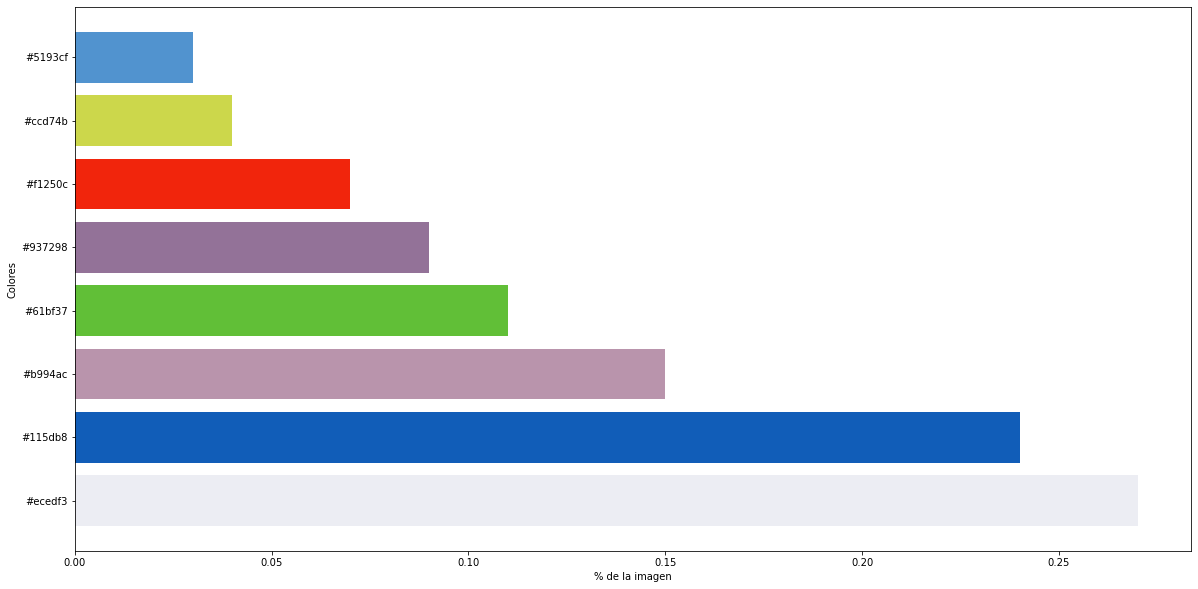

In [48]:
plt.figure(figsize=(20,10))
plt.barh(colorsDf['hex'], colorsDf['%'], color= colorsDf['hex'])
plt.xlabel('% de la imagen')
plt.ylabel('Colores')

## Bonus

In [58]:
def graficarColores(path):
    pic = io.imread(path)
    x,y,z = pic.shape
    reshapedArr = pic.reshape([x*y,z])
    miniKmeans = KMeans(n_clusters=8)
    miniKmeans.fit_predict(reshapedArr)
    centroides = miniKmeans.cluster_centers_
    # usamos la funcion definida anteriormente para pasar de rgb a hex
    colors_centros =  list(map(lambda x: rgb_hex_it(x), centroides))
    frequency = list(np.unique(kmeans.labels_, return_counts=True)[1])
    percents = list(map(lambda x: round(x/sum(frequency), 2),frequency))
    hashDict={'hex':colors_centros, '%':percents, 'freq':frequency}
    colorsDf=pd.DataFrame(data=hashDict).sort_values(by='%', ascending=False)
    plt.figure(figsize=(20,10))
    plt.barh(colorsDf['hex'], colorsDf['%'], color= colorsDf['hex'])
    plt.xlabel('% de la imagen')
    plt.ylabel('Colores')

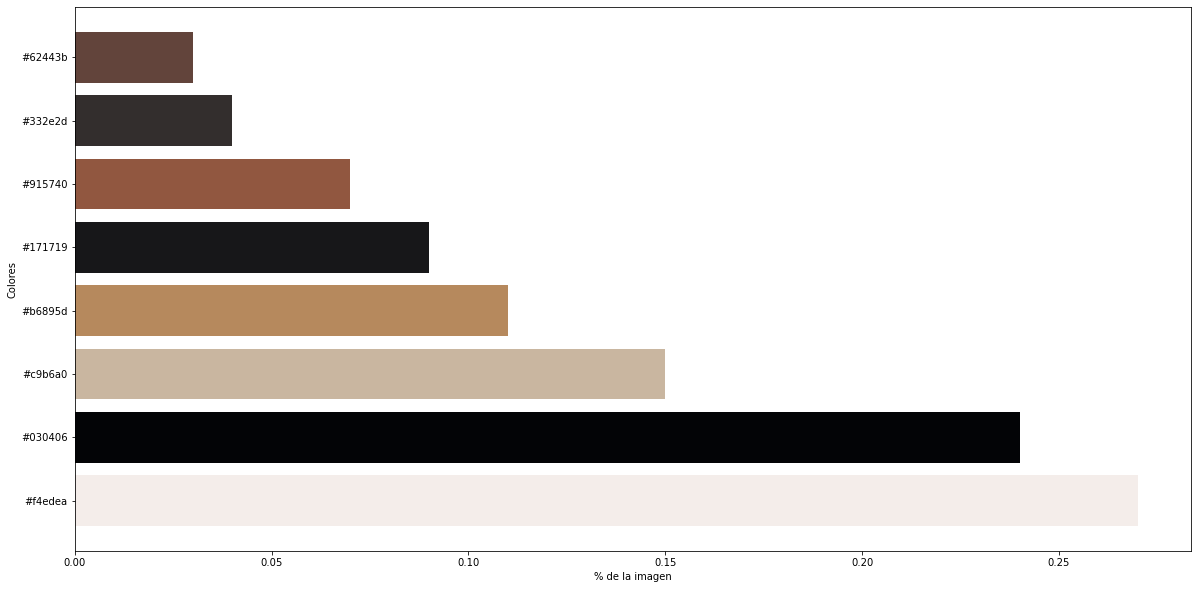

In [61]:
graficarColores('album_covers/outkast-stankonia.jpg')

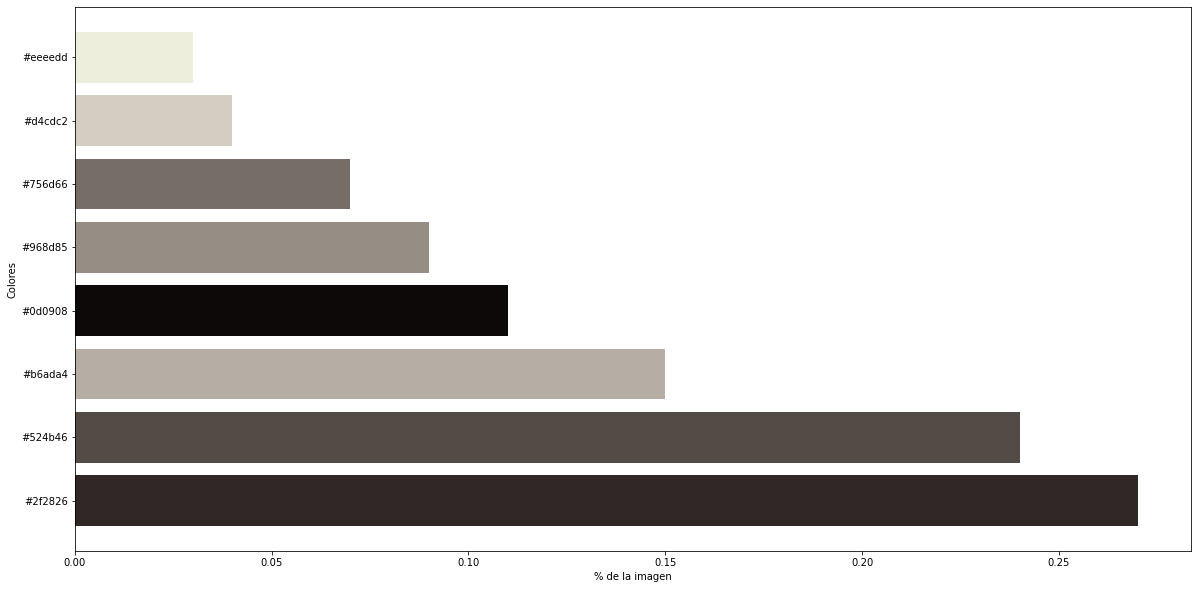

In [60]:
graficarColores('album_covers/deafheaven-roads-to-judah.jpg')